PARAMETERS


In [1]:
import pandas as pd
import glob
import os

# Specify the path where the CSV files are located
path = "/content/"  # Adjust this path based on where your files are located

# Get a list of all CSV files in the specified path
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Read all CSV files into a single DataFrame
dataframes = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(dataframes, ignore_index=True)

# Add a simulation identifier to track which simulation each row belongs to
combined_df['simulation_id'] = combined_df.index // len(dataframes[0])

# Display the first few rows of the combined DataFrame
combined_df.head()


,SLOW?,Reward Earned,Reward Cost,Gas Cost,Total Neighbours,Slow Neighbours,simulation_id
0,0,0.0,0,0,4,0.00,0
1,0,0.0,0,0,4,0.00,0
2,0,0.0,0,0,8,0.25,0
3,0,0.0,0,0,8,0.25,0
4,0,0.0,0,0,4,0.00,0


In [2]:
# Calculate average values for each metric
avg_values = combined_df.groupby('simulation_id').mean()

# Print out the averages
print(avg_values)

# Overall averages across all simulations
overall_averages = avg_values.mean()
print(f"Overall Averages:\n{overall_averages}")


               SLOW?  Reward Earned  Reward Cost  Gas Cost  Total Neighbours  \
simulation_id                                                                  
0               0.20       0.000000          0.0      0.00              6.04   
1               0.28     151.687500        592.0      0.56              6.04   
2               0.25     215.742188        869.0      0.90              5.98   
3               0.76       6.500000         13.0      0.52              6.26   
4               0.28     217.015625        874.0      0.59              6.18   
5               0.24     154.781250        567.0      0.68              6.18   
6               0.29     114.132812        430.0      0.48              5.90   

               Slow Neighbours  
simulation_id                   
0                     0.190333  
1                     0.283940  
2                     0.245512  
3                     0.760024  
4                     0.283345  
5                     0.232595  
6              

                     SLOW?  Reward Earned  Reward Cost  Gas Cost  \
SLOW?             1.000000      -0.484748    -0.482037  0.060262   
Reward Earned    -0.484748       1.000000     0.998332  0.766529   
Reward Cost      -0.482037       0.998332     1.000000  0.755496   
Gas Cost          0.060262       0.766529     0.755496  1.000000   
Total Neighbours  0.580904      -0.179185    -0.185150  0.053234   
Slow Neighbours   0.999426      -0.472635    -0.469965  0.066847   

                  Total Neighbours  Slow Neighbours  
SLOW?                     0.580904         0.999426  
Reward Earned            -0.179185        -0.472635  
Reward Cost              -0.185150        -0.469965  
Gas Cost                  0.053234         0.066847  
Total Neighbours          1.000000         0.567688  
Slow Neighbours           0.567688         1.000000  


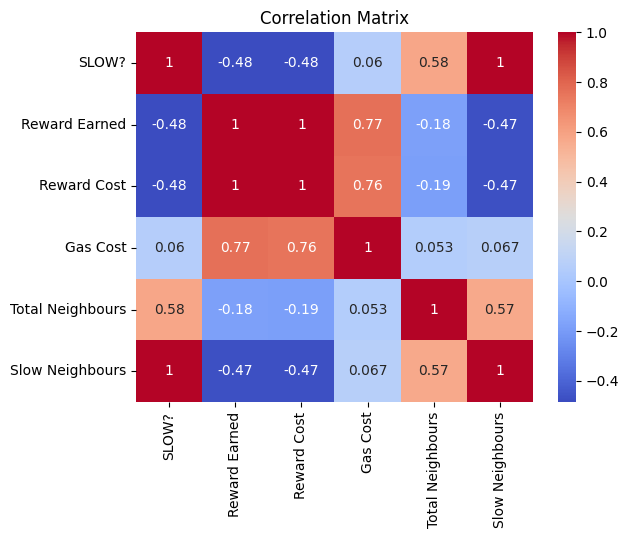

In [3]:
# Correlation analysis
correlation_matrix = avg_values.corr()
print(correlation_matrix)

# Visualization of correlations
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


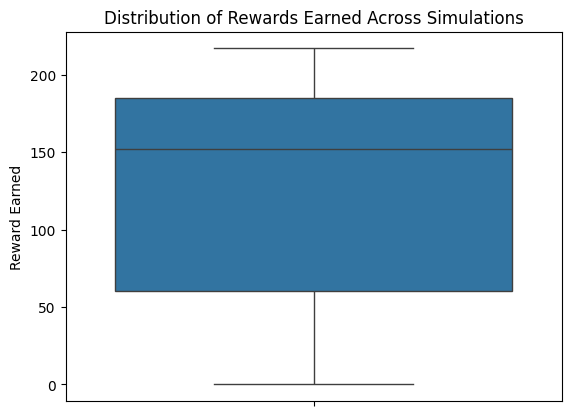

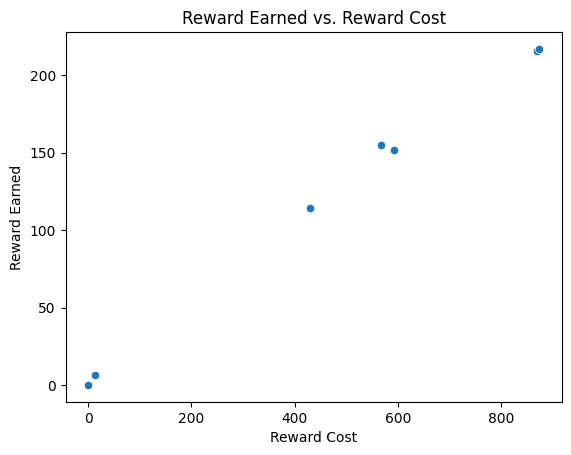

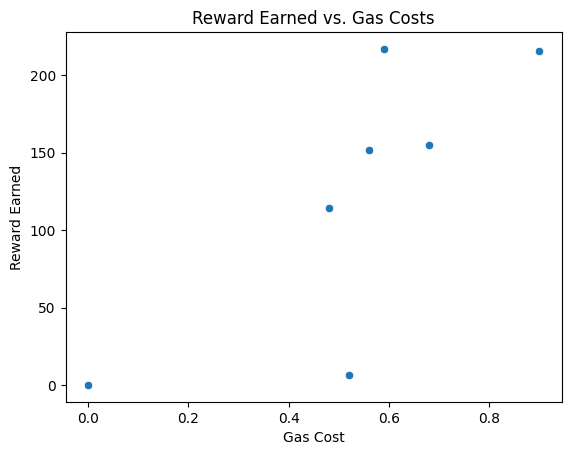

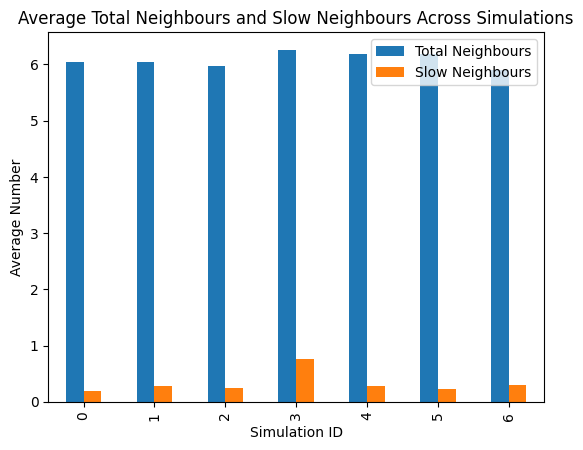

In [4]:
# Box plot of rewards earned across simulations
sns.boxplot(data=avg_values, y='Reward Earned')
plt.title('Distribution of Rewards Earned Across Simulations')
plt.show()

# Scatter plot of reward earned vs. reward cost
sns.scatterplot(data=avg_values, x='Reward Cost', y='Reward Earned')
plt.title('Reward Earned vs. Reward Cost')
plt.xlabel('Reward Cost')
plt.ylabel('Reward Earned')
plt.show()

# Scatter plot of reward earned vs. gas fees
sns.scatterplot(data=avg_values, x='Gas Cost', y='Reward Earned')
plt.title('Reward Earned vs. Gas Costs')
plt.xlabel('Gas Cost')
plt.ylabel('Reward Earned')
plt.show()

# Bar plot of average total neighbors and slow neighbors
avg_values[['Total Neighbours', 'Slow Neighbours']].plot(kind='bar')
plt.title('Average Total Neighbours and Slow Neighbours Across Simulations')
plt.xlabel('Simulation ID')
plt.ylabel('Average Number')
plt.show()
